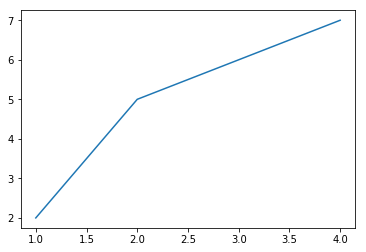

In [1]:
######Linear graphs #####

####Getting the simplest plot done

from matplotlib import pyplot as plt
%matplotlib inline
plt.plot([1,2,3,4],[2,5,6,7])
plt.show()

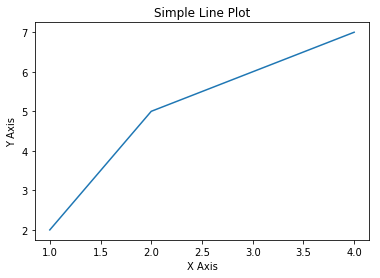

In [2]:
######Linear graphs #####
###Now lets generate the X,y,lables,titles

X=[1,2,3,4]
y=[2,5,6,7]

plt.plot(X,y)
plt.title('Simple Line Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

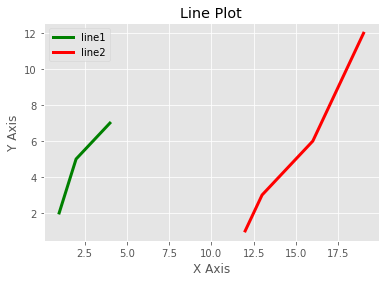

In [3]:
######Linear graphs #####
###now lets add style to your plots for that you import matplotlib.style

from matplotlib import style

style.use('ggplot') ##We will use ggplot

X=[1,2,3,4]
y=[2,5,6,7]


X2= [12,13,16,19]
y2 = [1,3,6,12]

plt.plot(X,y,'g',label='line1',linewidth=3) ##g signifies green color, line1 is the name and linewidth is the widhth
plt.plot(X2,y2,'r',label='line2',linewidth=3)
plt.title('Line Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.legend() ##to display the legends
plt.grid(True,color='w') ##to display the grid lines

plt.show()

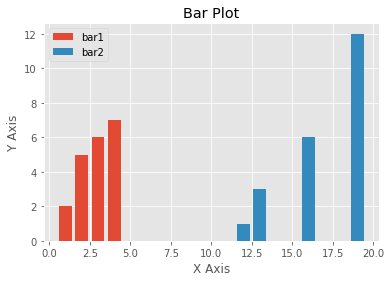

In [4]:
###Bar graphs ######
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot') ##We will use ggplot

X=[1,2,3,4]
y=[2,5,6,7]


X2= [12,13,16,19]
y2 = [1,3,6,12]

plt.bar(X,y,label='bar1') ###just use bar instead of line
plt.bar(X2,y2,label='bar2')
plt.title('Bar Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend() 

plt.show()

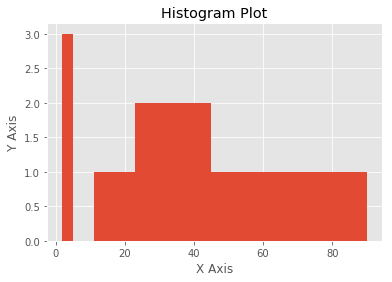

In [5]:
###Histogram plot ######
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot') ##We will use ggplot

X=[1,2,3,4,12,34,55,64,23,89]
bins=[2,5,6,7,11,23,45,60,70,90]
plt.hist(X,bins,histtype='bar',) ###just use hist instead of bar and specify histtype=bar

plt.title('Histogram Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.show()

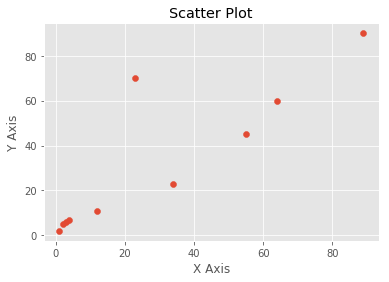

In [6]:
###Scatter plot ######
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot') ##We will use ggplot

X=[1,2,3,4,12,34,55,64,23,89]
y=[2,5,6,7,11,23,45,60,70,90]
plt.scatter(X,y) ###just use hist instead of bar and specify histtype=bar

plt.title('Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.show()

Text(0, 0.5, 'Y')

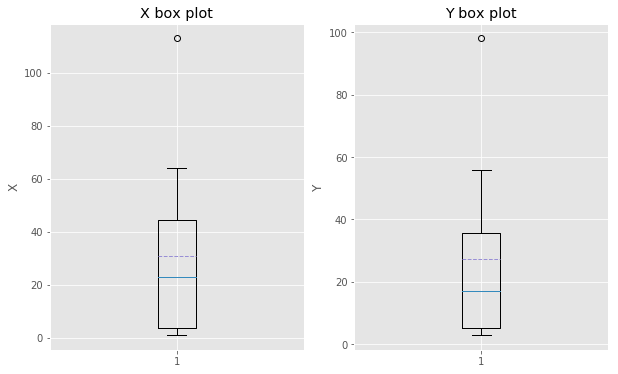

In [7]:
### box plot####
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,6])
X=[1,2,3,4,12,34,55,64,23,30,113]
Y = [3,4,5,6,32,12,56,98,22,37]
plt.subplot(121)
plt.boxplot(X,showmeans=True,meanline = True)
plt.title('X box plot')
plt.ylabel('X')
plt.subplot(122)
plt.boxplot(Y,showmeans=True,meanline = True)
plt.title('Y box plot')
plt.ylabel('Y')


SEABORN - WITH SUBPLOTS

Now lets look at some advanced visualisation with seaborn We will use subplots with axis First we create the grid and then assign values of the axis to each plot


In [8]:
import seaborn as sns
import pandas as pd
df = pd.read_csv(r'C:\Jupyter\titanic_filtered.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Unnamed: 0.1", axis=1, inplace=True)
df.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.34,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.55,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.55,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.55,S


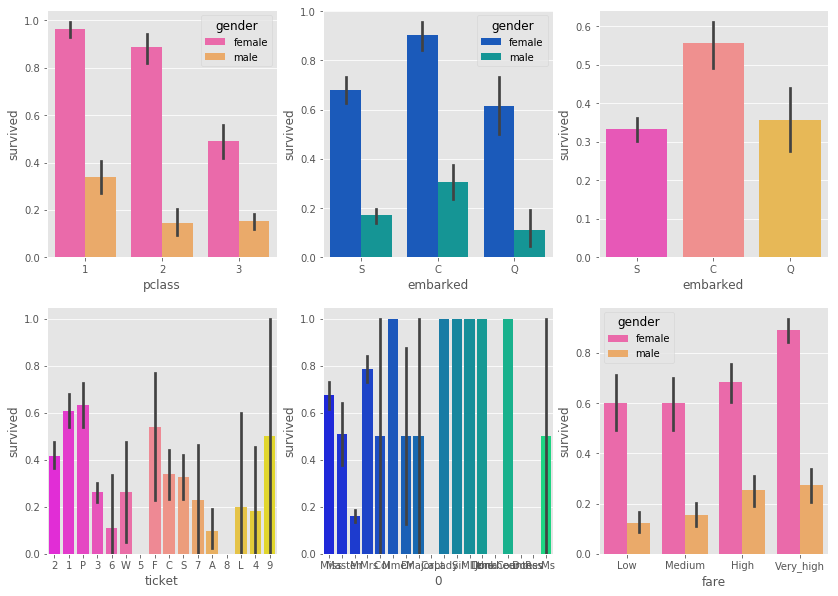

In [9]:
fig, axis = plt.subplots(2, 3,figsize=(14,10))
sns.barplot(x='pclass',y='survived',data=df,ax=axis[0,0],hue='gender',palette='spring')
sns.barplot(x=df['embarked'],y='survived',data=df,ax=axis[0,1],hue='gender',palette='winter')
sns.barplot(x=df['embarked'],y='survived',data=df,ax=axis[0,2],palette='spring')
sns.barplot(x=df['ticket'].str.slice(0,1),y='survived',data=df,ax=axis[1,0],palette='spring')
sns.barplot(x=df['name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0],y='survived',data=df,ax=axis[1,1],palette='winter')
sns.barplot(x=pd.qcut(df['fare'],4,['Low','Medium','High','Very_high']),y='survived',data=df,ax=axis[1,2],hue='gender',palette='spring')

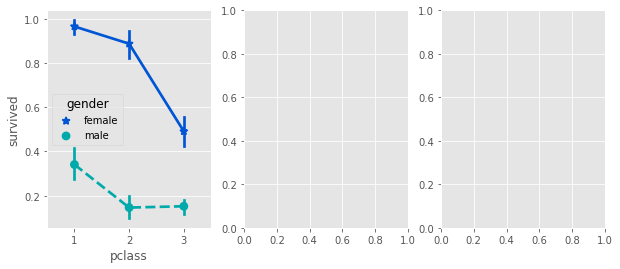

In [10]:
fig, axis = plt.subplots(1,3,figsize=(10,4))
sns.pointplot(x='pclass',y='survived', data=df, ax = axis[0],hue='gender' ,palette='winter',markers=["*", "o"], linestyles=["-", "--"])
#sns.barplot(x='pclass',y='survived',data=df,ax=axis[0],hue='gender',palette='spring')


FACET GRID - Broken up graphs by row,col,hue

We will first create the Facet Grid, pass the dataframe, will tell seaborn on what basis we want to break the subplots dowwn, row,col,hue and then map the sns plots on top of it


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


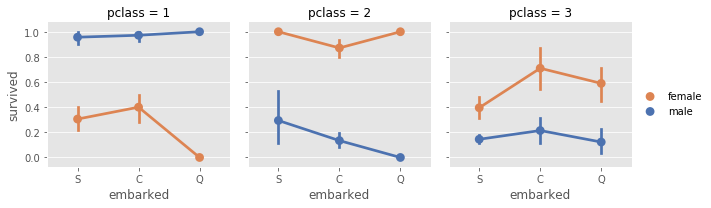

In [11]:
fg = sns.FacetGrid(df,col="pclass")
fg.map(sns.pointplot,'embarked', 'survived', 'gender', palette='deep')
fg.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


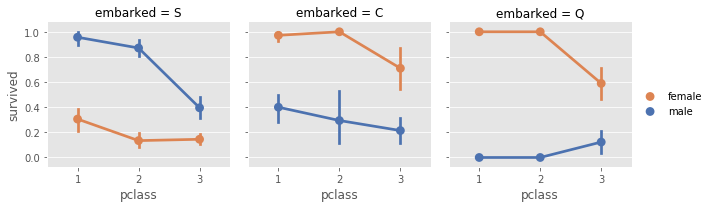

In [12]:
fg = sns.FacetGrid(df,col="embarked")
fg.map(sns.pointplot,'pclass', 'survived', 'gender', palette='deep')
fg.add_legend()

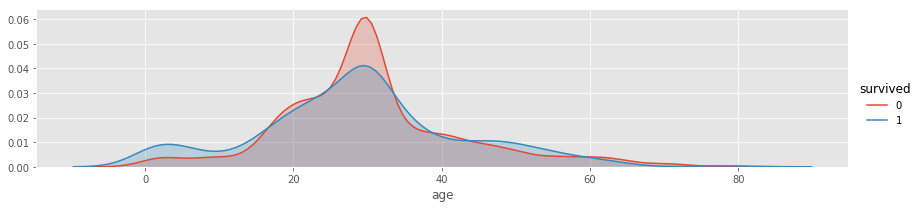

In [13]:
a = sns.FacetGrid( df, hue = 'survived', aspect=4 )
a.map(sns.kdeplot, 'age', shade= True )
##a.set(xlim=(0 , df['Age'].max()))
a.add_legend()

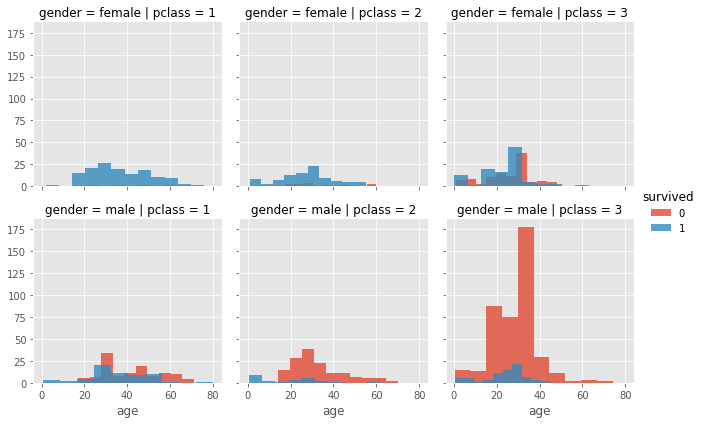

In [14]:
his = sns.FacetGrid(df,row='gender',col = 'pclass',hue='survived')
his.map(plt.hist,'age',alpha=0.80)
his.add_legend()

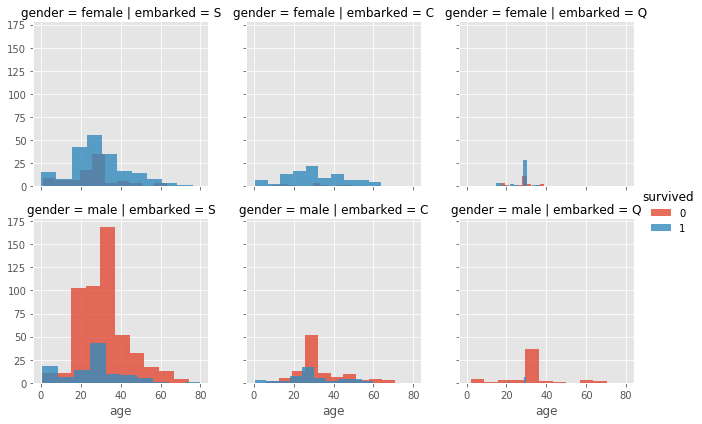

In [15]:
his = sns.FacetGrid(df,row='gender',col = 'embarked',hue='survived')
his.map(plt.hist,'age',alpha=0.80)
his.add_legend()

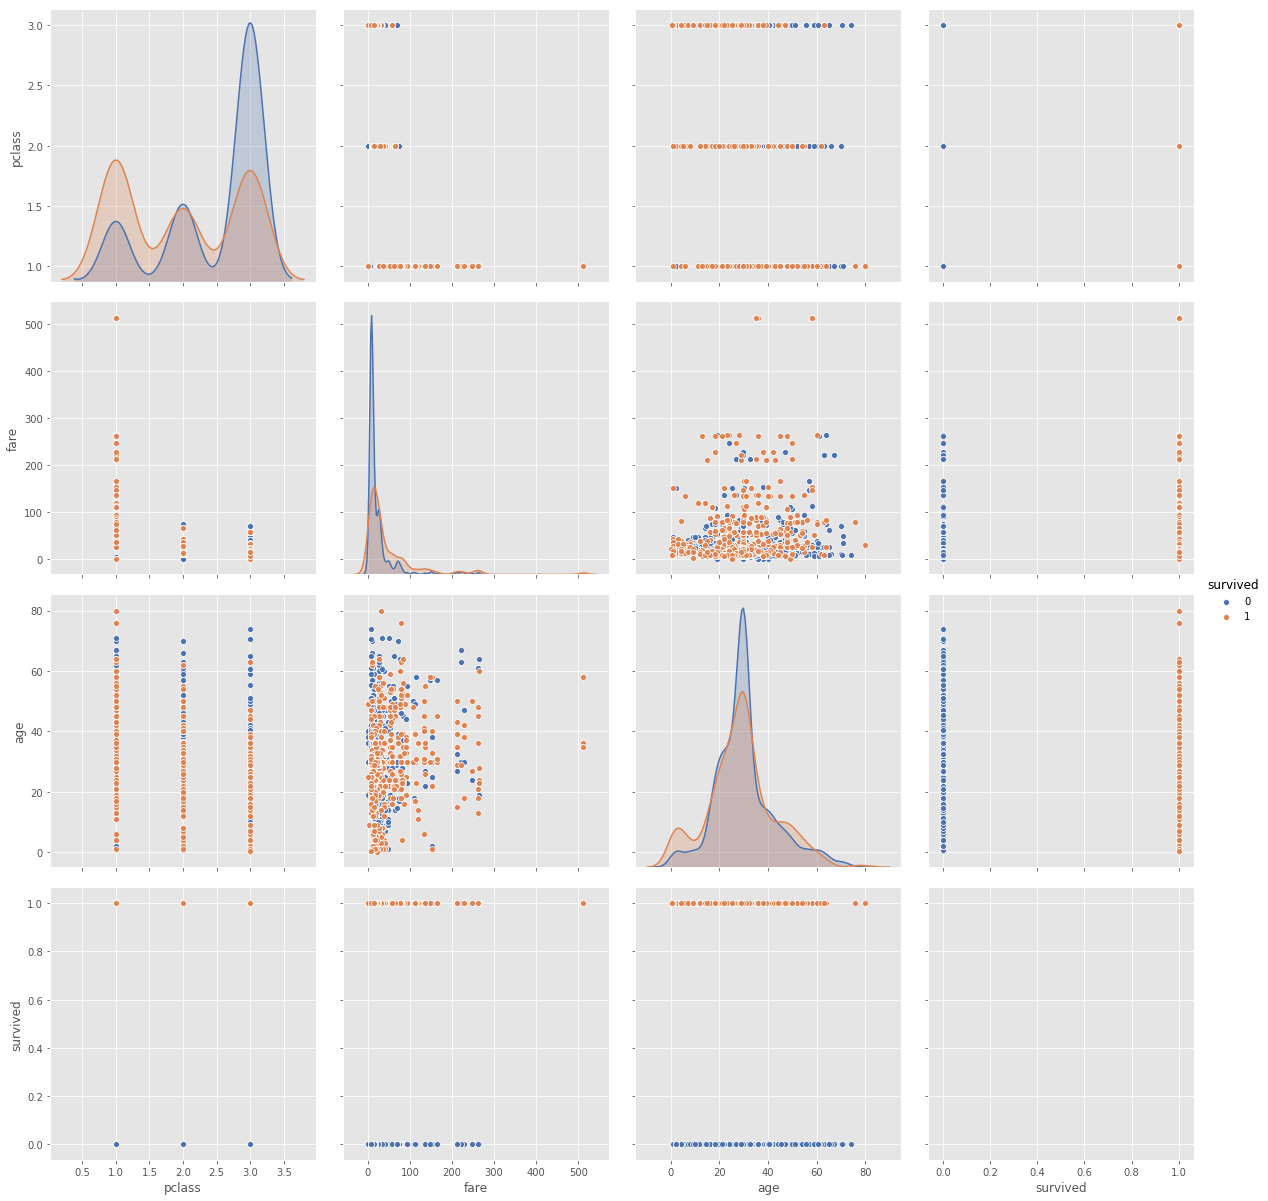

In [16]:
import warnings
warnings.filterwarnings("ignore")
pp = sns.pairplot(df[['pclass','fare','age','survived']], hue = 'survived', palette = 'deep', size=4.2, diag_kind = 'kde')

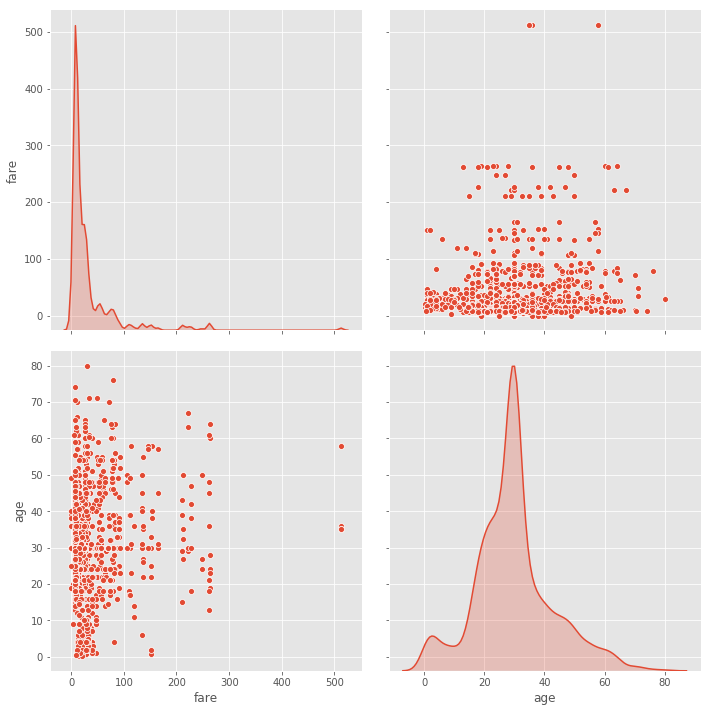

In [17]:
import warnings
warnings.filterwarnings("ignore")
pp = sns.pairplot(df[['fare','age']], palette = 'winter', size=5, diag_kind = 'kde')

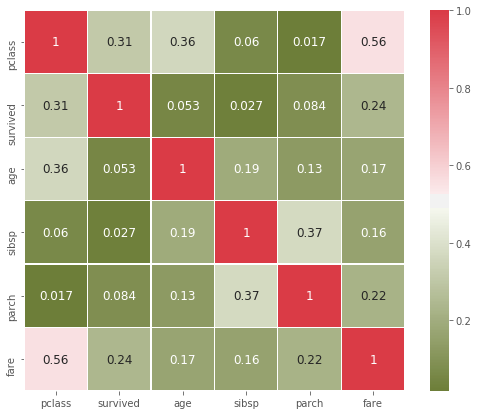

In [18]:
color_map = sns.diverging_palette(100,10,as_cmap=True)
plt.figure(figsize=(9,7))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'fontsize': 12}, linewidths=.1,square=True,cmap=color_map)


OTHER SEABORN PLOT

Now that we know how to have multiple plots in the grid, lets look at various kinds of plots we have in seaborn

Distribution Plots - X - Continuous


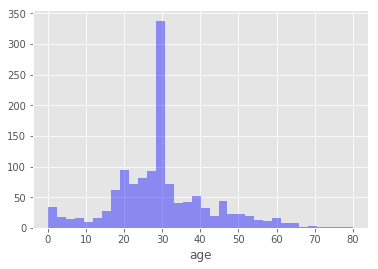

In [19]:
sns.distplot(df.loc[df['age'].notnull(),'age'],kde=False,color='blue',norm_hist=False)

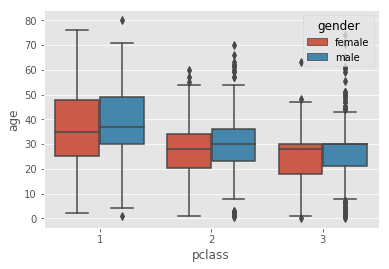

In [20]:
sns.boxplot(x='pclass',y='age',hue='gender',data=df)


LMPLOT - For comparing two variables w/wo Hue

X- Continuos Y- Continuous


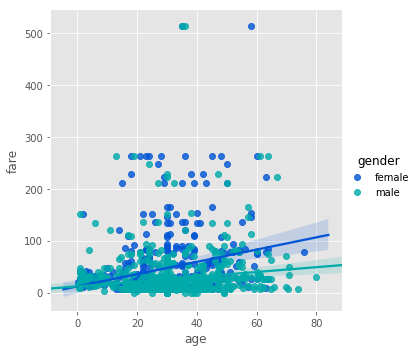

In [21]:
sns.lmplot(x='age',y='fare', data=df,palette='winter',hue='gender')



SWARMPLOT

X-Categorical Y-Continuous


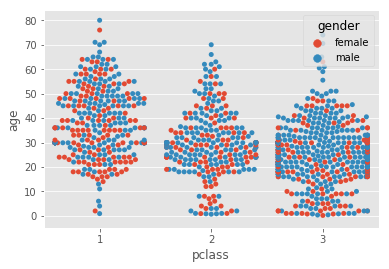

In [22]:
sns.swarmplot(x='pclass',y='age',hue='gender',data=df)


VIOLIN PLOT

X-Categorical Y-Continuous


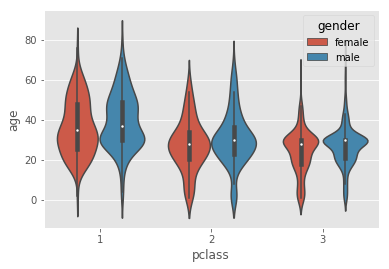

In [23]:
plot = sns.violinplot(x='pclass',y='age',hue='gender',data=df)


JOINT PLOT

to check correlation between two continuous variables and simultaneoulsy check invidual variable distribution


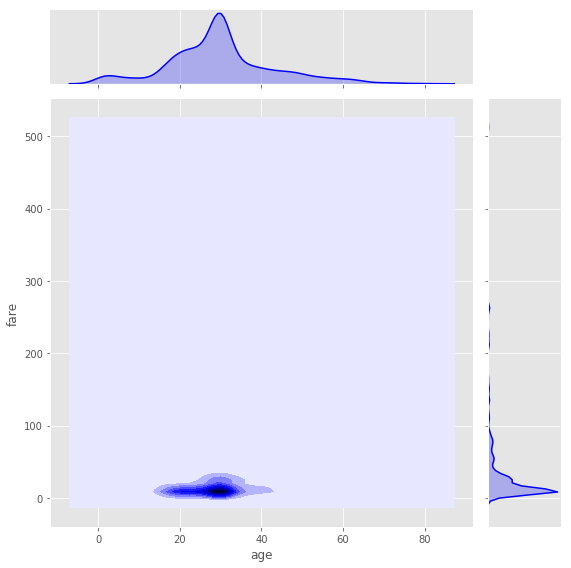

In [24]:
sns.jointplot(x='age',y='fare',data=df,kind='kde',size=8,ratio=5,color='Blue')

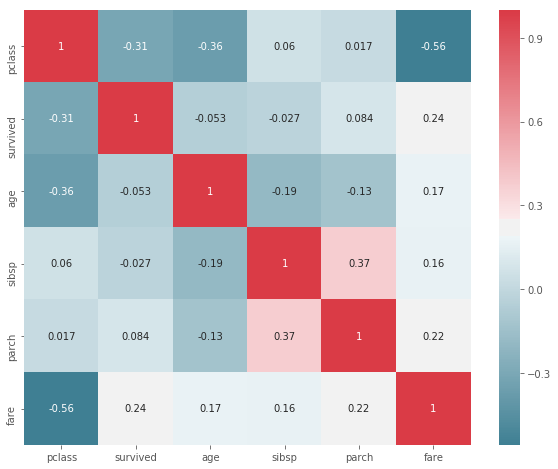

In [25]:
color_map = sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),cmap=color_map,annot=True)


COUNT PLOT

When you want to check the frequency distribution


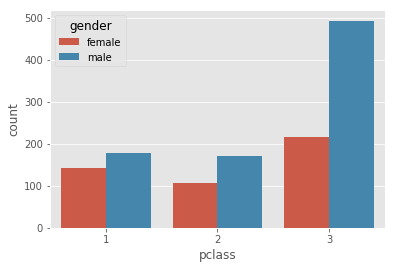

In [26]:
sns.countplot(x='pclass',hue='gender',data=df)


WORDCLOUD

if you want to see the most frequent word in the disctionary by its frequency


In [27]:
word_freq = {
    'Pandas' : 45,
    'Numpy'  : 34,
    'BeautifulSoup' : 55,
    'Seaborn': 101,
    'Matplotlib' : 22,
    'Scikitlearn' : 101,
    'wordcloud'  : 200,
    'nltk'     : 150,
    'Spacy'    : 104,
    'Jason'    : 55
}

In [28]:
#!pip install pillow
#!pip install wordcloud
from wordcloud import WordCloud

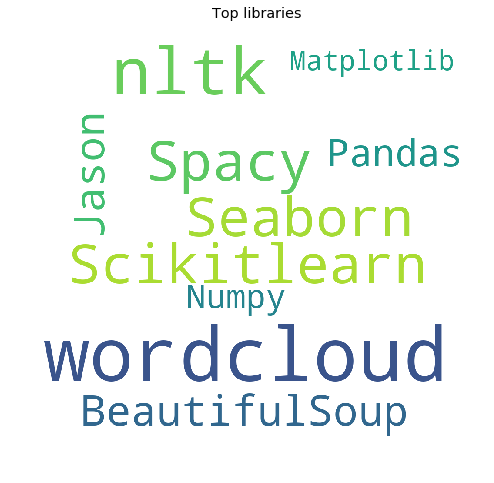

In [29]:
plt.figure(figsize = (12, 8))
wordcloud = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq)
plt.imshow(wordcloud)
plt.title('Top libraries')
plt.axis("off")
plt.show()